In [1]:
#Import basic frameworks
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#Import model selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_validate

#ANN frameworks
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU

#Import measurement metrics
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
#Read CSV file
data = pd.read_csv(r"C:\\Users\\cvveljanovski\\Desktop\\Learning\\DataScience\\Datasets\\ANN\\Churn_Modelling.csv")

In [3]:
#We are going to drop the columns that we don't need
data.drop(["RowNumber","CustomerId", "Surname"],inplace=True,axis=1) 

In [4]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


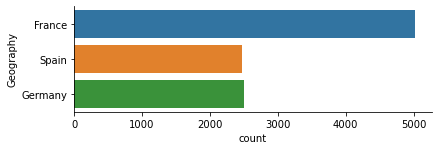

In [5]:
# Distribution of customers by Geography
sns.factorplot(y="Geography", data = data, kind = "count", size = 2, aspect = 3)

#### Many customers are from France

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


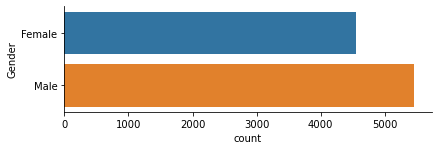

In [6]:
# Distribution of customers by Gender
sns.factorplot(y="Gender", data = data, kind = "count", size = 2, aspect = 3)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


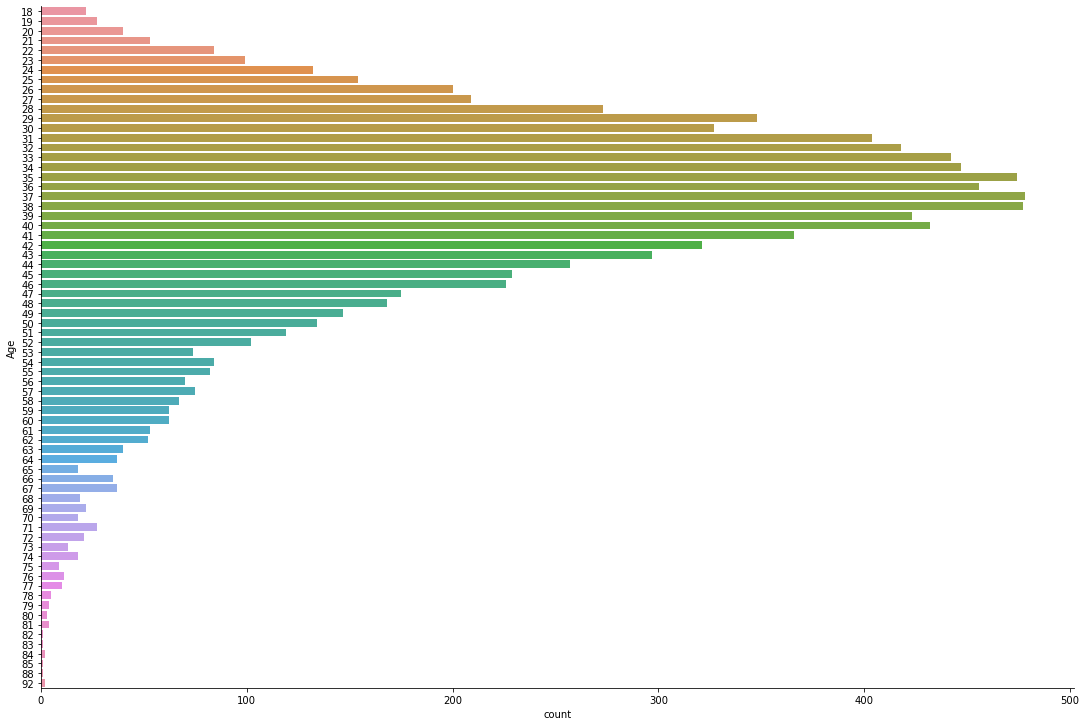

In [7]:
# Distribution of customers by Age
sns.factorplot(y="Age", data = data, kind = "count", size = 10, aspect = 1.5)

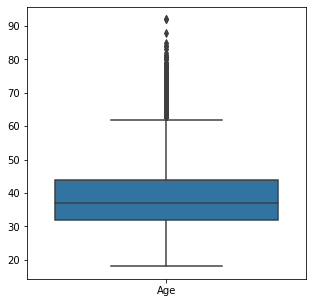

In [8]:
sns.boxplot(data=data[["Age"]])
fig=plt.gcf()
fig.set_size_inches(5,5)

#### As expected we have the most number of customers between 27 and 46

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


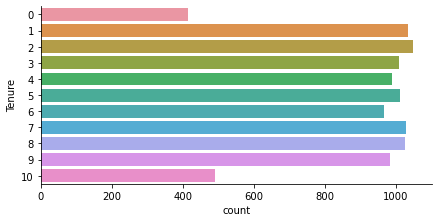

In [9]:
# Distribution of customers by Tenure
sns.factorplot(y="Tenure", data = data, kind = "count", size = 3, aspect = 2)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


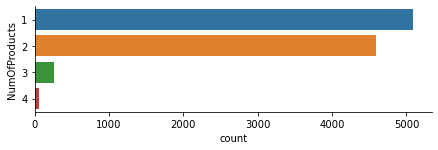

In [10]:
# Distribution of customers by Num of product
sns.factorplot(y="NumOfProducts", data = data, kind = "count", size = 2, aspect = 3)

#### We can see that the customers use mostly 1 or 2 product from the bank

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


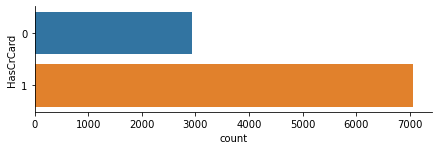

In [11]:
# Distribution of customers by Has Credit card
sns.factorplot(y="HasCrCard", data = data, kind = "count", size = 2, aspect = 3)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


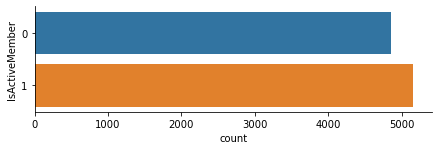

In [12]:
# Distribution of customers by Is Active Member
sns.factorplot(y="IsActiveMember", data = data, kind = "count", size = 2, aspect = 3)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


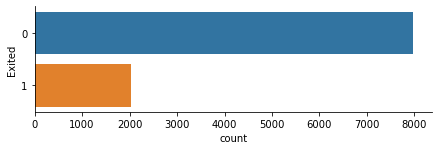

In [13]:
# Distribution of customers by Exited the bank
sns.factorplot(y="Exited", data = data, kind = "count", size = 2, aspect = 3)

<AxesSubplot:>

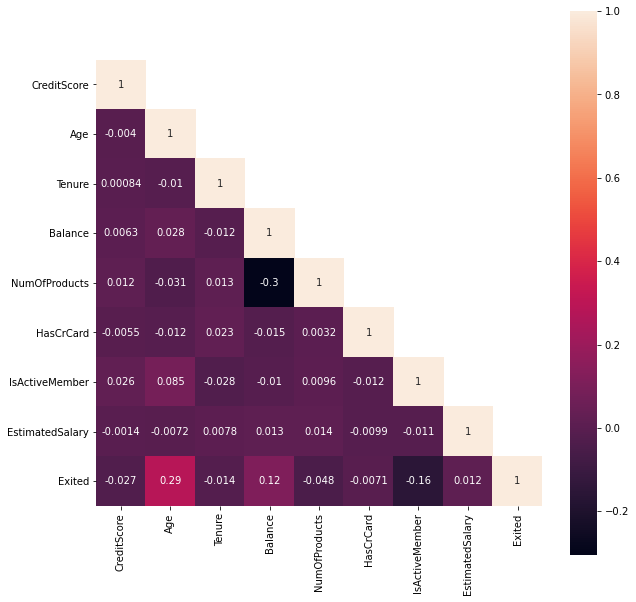

In [14]:
# Lets see the correlation among the different features
cor_mat=data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

# Feature engineering

In [16]:
#Which are the categorical features
cat = data.select_dtypes(include=["object"])
cat.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [17]:
# One hot encoding on the categorical features
cat_encoded = pd.get_dummies(cat)

In [18]:
# Now lets collect the data in one dataframe
df=pd.concat([data,cat_encoded],axis=1)
# Drop the features that we have performed one hot encoding on
df.drop(["Geography","Gender"],inplace=True,axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


# Now we will split the original dataframe in dataframe with independent features and df with dependent feature

In [19]:
# Goal is to predict if a customer will exit the bank or not
Y = df.Exited
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [20]:
X = df.drop("Exited",axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


# Split the data in train and test

In [21]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)

In [22]:
[X_train.shape, X_test.shape, Y_train.shape, Y_test.shape]

[(7000, 13), (3000, 13), (7000,), (3000,)]

In [23]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# Initialising the ANN
classifier = Sequential()

In [54]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, activation='relu', kernel_initializer='he_uniform', input_dim=13))
# We can add also dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [55]:
# Adding the second hidden layer
classifier.add(Dense(6, activation='relu', kernel_initializer='he_uniform'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [56]:
# Adding the output layer (output_dim is 1 as we want only 1 output from the final layer.)
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'))

In [57]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, Y_train, validation_split = 0.33, batch_size=10, epochs=100)

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.5474 - accuracy: 0.8038 - val_loss: 0.4128 - val_accuracy: 0.8408
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.8383 - val_loss: 0.3827 - val_accuracy: 0.8524
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8401 - val_loss: 0.3688 - val_accuracy: 0.8576
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3787 - accuracy: 0.8488 - val_loss: 0.3667 - val_accuracy: 0.8529
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3748 - accuracy: 0.8518 - val_loss: 0.3649 - val_accuracy: 0.8563
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3693 - accuracy: 0.8469 - val_loss: 0.3608 - val_accuracy: 0.8568
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3643 - accuracy: 0.8488 - val_loss: 0.3625 - val_accuracy: 0.8589

In [59]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


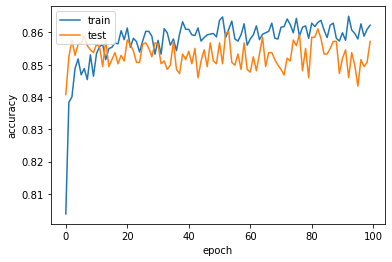

In [62]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','test'], loc = 'upper left')
plt.show()